In [24]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq
import datetime

In [25]:
# 載入資料
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 反轉輸入內容
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
x_train

array([[13, 11,  4, ...,  1,  4, 10],
       [ 6,  5,  5, ...,  0,  4,  8],
       [13,  4,  0, ...,  1,  9,  9],
       ...,
       [10,  4,  5, ...,  6,  9, 10],
       [13, 13,  4, ...,  5,  1,  9],
       [13, 13,  6, ...,  8,  1,  5]])

In [26]:
# 設定超參數
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    print(datetime.datetime.now())
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model.save_params()


2020-05-08 07:28:54.822397
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.64
| epoch 1 |  iter 21 / 351 | time 4[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 8[s] | loss 2.03
| epoch 1 |  iter 61 / 351 | time 12[s] | loss 1.92
| epoch 1 |  iter 81 / 351 | time 16[s] | loss 1.88
| epoch 1 |  iter 101 / 351 | time 21[s] | loss 1.85
| epoch 1 |  iter 121 / 351 | time 25[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 29[s] | loss 1.79
| epoch 1 |  iter 161 / 351 | time 33[s] | loss 1.77
| epoch 1 |  iter 181 / 351 | time 38[s] | loss 1.76
| epoch 1 |  iter 201 / 351 | time 42[s] | loss 1.75
| epoch 1 |  iter 221 / 351 | time 46[s] | loss 1.74
| epoch 1 |  iter 241 / 351 | time 50[s] | loss 1.74
| epoch 1 |  iter 261 / 351 | time 54[s] | loss 1.73
| epoch 1 |  iter 281 / 351 | time 58[s] | loss 1.73
| epoch 1 |  iter 301 / 351 | time 62[s] | loss 1.73
| epoch 1 |  iter 321 / 351 | time 66[s] | loss 1.72
| epoch 1 |  iter 341 / 351 | time 70[s] | loss 1.71
Q 77+85  
T 162 
☒ 100 
---


| epoch 7 |  iter 21 / 351 | time 5[s] | loss 0.73
| epoch 7 |  iter 41 / 351 | time 9[s] | loss 0.74
| epoch 7 |  iter 61 / 351 | time 13[s] | loss 0.70
| epoch 7 |  iter 81 / 351 | time 18[s] | loss 0.68
| epoch 7 |  iter 101 / 351 | time 22[s] | loss 0.81
| epoch 7 |  iter 121 / 351 | time 27[s] | loss 0.73
| epoch 7 |  iter 141 / 351 | time 31[s] | loss 0.69
| epoch 7 |  iter 161 / 351 | time 35[s] | loss 0.68
| epoch 7 |  iter 181 / 351 | time 40[s] | loss 0.67
| epoch 7 |  iter 201 / 351 | time 44[s] | loss 0.67
| epoch 7 |  iter 221 / 351 | time 48[s] | loss 0.70
| epoch 7 |  iter 241 / 351 | time 53[s] | loss 0.67
| epoch 7 |  iter 261 / 351 | time 57[s] | loss 0.67
| epoch 7 |  iter 281 / 351 | time 61[s] | loss 0.66
| epoch 7 |  iter 301 / 351 | time 66[s] | loss 0.66
| epoch 7 |  iter 321 / 351 | time 70[s] | loss 0.68
| epoch 7 |  iter 341 / 351 | time 74[s] | loss 0.63
Q 77+85  
T 162 
☒ 160 
---
Q 975+164
T 1139
☒ 1136
---
Q 582+84 
T 666 
☒ 663 
---
Q 8+155  
T 163 
☑ 16

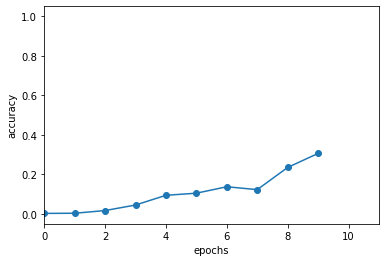

In [27]:
# 繪圖
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 11)
plt.show()

In [28]:
model_s2s = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model_s2s, optimizer)

acc_list_s2s = []
for epoch in range(max_epoch):
    print(datetime.datetime.now())
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model_s2s, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list_s2s.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model_s2s.save_params()


2020-05-08 07:48:27.482337
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.64
| epoch 1 |  iter 21 / 351 | time 3[s] | loss 2.50
| epoch 1 |  iter 41 / 351 | time 6[s] | loss 2.03
| epoch 1 |  iter 61 / 351 | time 9[s] | loss 1.92
| epoch 1 |  iter 81 / 351 | time 13[s] | loss 1.90
| epoch 1 |  iter 101 / 351 | time 16[s] | loss 1.84
| epoch 1 |  iter 121 / 351 | time 19[s] | loss 1.79
| epoch 1 |  iter 141 / 351 | time 23[s] | loss 1.79
| epoch 1 |  iter 161 / 351 | time 27[s] | loss 1.78
| epoch 1 |  iter 181 / 351 | time 30[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 33[s] | loss 1.76
| epoch 1 |  iter 221 / 351 | time 37[s] | loss 1.75
| epoch 1 |  iter 241 / 351 | time 41[s] | loss 1.75
| epoch 1 |  iter 261 / 351 | time 44[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 48[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 52[s] | loss 1.73
| epoch 1 |  iter 321 / 351 | time 55[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 59[s] | loss 1.72
Q 77+85  
T 162 
☒ 102 
---
Q

| epoch 7 |  iter 21 / 351 | time 4[s] | loss 0.66
| epoch 7 |  iter 41 / 351 | time 7[s] | loss 0.65
| epoch 7 |  iter 61 / 351 | time 11[s] | loss 0.64
| epoch 7 |  iter 81 / 351 | time 15[s] | loss 0.65
| epoch 7 |  iter 101 / 351 | time 18[s] | loss 0.65
| epoch 7 |  iter 121 / 351 | time 22[s] | loss 0.63
| epoch 7 |  iter 141 / 351 | time 26[s] | loss 0.63
| epoch 7 |  iter 161 / 351 | time 29[s] | loss 0.63
| epoch 7 |  iter 181 / 351 | time 33[s] | loss 0.70
| epoch 7 |  iter 201 / 351 | time 37[s] | loss 0.69
| epoch 7 |  iter 221 / 351 | time 40[s] | loss 0.63
| epoch 7 |  iter 241 / 351 | time 44[s] | loss 0.62
| epoch 7 |  iter 261 / 351 | time 48[s] | loss 0.60
| epoch 7 |  iter 281 / 351 | time 51[s] | loss 0.58
| epoch 7 |  iter 301 / 351 | time 55[s] | loss 0.58
| epoch 7 |  iter 321 / 351 | time 59[s] | loss 0.58
| epoch 7 |  iter 341 / 351 | time 62[s] | loss 0.59
Q 77+85  
T 162 
☒ 160 
---
Q 975+164
T 1139
☒ 1141
---
Q 582+84 
T 666 
☒ 665 
---
Q 8+155  
T 163 
☒ 16

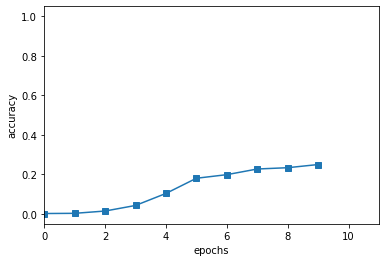

In [31]:
# 繪圖
x = np.arange(len(acc_list))
plt.plot(x, acc_list_s2s, marker='s')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 11)
plt.show()

In [29]:
model_ps2s = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model_ps2s, optimizer)

acc_list_ps2s = []
for epoch in range(max_epoch):
    print(datetime.datetime.now())
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model_ps2s, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list_ps2s.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model_ps2s.save_params()


2020-05-08 08:03:56.196641
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.64
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.44
| epoch 1 |  iter 41 / 351 | time 3[s] | loss 2.06
| epoch 1 |  iter 61 / 351 | time 6[s] | loss 1.93
| epoch 1 |  iter 81 / 351 | time 7[s] | loss 1.85
| epoch 1 |  iter 101 / 351 | time 9[s] | loss 1.79
| epoch 1 |  iter 121 / 351 | time 11[s] | loss 1.78
| epoch 1 |  iter 141 / 351 | time 13[s] | loss 1.77
| epoch 1 |  iter 161 / 351 | time 15[s] | loss 1.76
| epoch 1 |  iter 181 / 351 | time 17[s] | loss 1.75
| epoch 1 |  iter 201 / 351 | time 19[s] | loss 1.75
| epoch 1 |  iter 221 / 351 | time 22[s] | loss 1.74
| epoch 1 |  iter 241 / 351 | time 24[s] | loss 1.73
| epoch 1 |  iter 261 / 351 | time 26[s] | loss 1.72
| epoch 1 |  iter 281 / 351 | time 28[s] | loss 1.72
| epoch 1 |  iter 301 / 351 | time 30[s] | loss 1.71
| epoch 1 |  iter 321 / 351 | time 32[s] | loss 1.69
| epoch 1 |  iter 341 / 351 | time 34[s] | loss 1.68
Q 77+85  
T 162 
☒ 1000
---
Q 9

| epoch 7 |  iter 21 / 351 | time 2[s] | loss 0.07
| epoch 7 |  iter 41 / 351 | time 4[s] | loss 0.07
| epoch 7 |  iter 61 / 351 | time 6[s] | loss 0.07
| epoch 7 |  iter 81 / 351 | time 8[s] | loss 0.06
| epoch 7 |  iter 101 / 351 | time 11[s] | loss 0.06
| epoch 7 |  iter 121 / 351 | time 13[s] | loss 0.06
| epoch 7 |  iter 141 / 351 | time 15[s] | loss 0.06
| epoch 7 |  iter 161 / 351 | time 17[s] | loss 0.07
| epoch 7 |  iter 181 / 351 | time 19[s] | loss 0.06
| epoch 7 |  iter 201 / 351 | time 22[s] | loss 0.06
| epoch 7 |  iter 221 / 351 | time 24[s] | loss 0.06
| epoch 7 |  iter 241 / 351 | time 26[s] | loss 0.08
| epoch 7 |  iter 261 / 351 | time 28[s] | loss 0.07
| epoch 7 |  iter 281 / 351 | time 30[s] | loss 0.07
| epoch 7 |  iter 301 / 351 | time 33[s] | loss 0.07
| epoch 7 |  iter 321 / 351 | time 35[s] | loss 0.07
| epoch 7 |  iter 341 / 351 | time 37[s] | loss 0.07
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☑ 163 

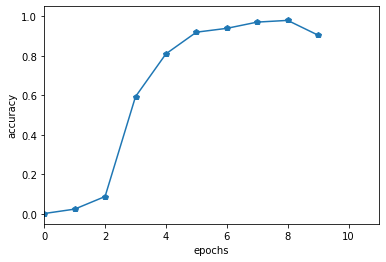

In [32]:
# 繪圖
x = np.arange(len(acc_list))
plt.plot(x, acc_list_ps2s, marker='p')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 11)
plt.show()

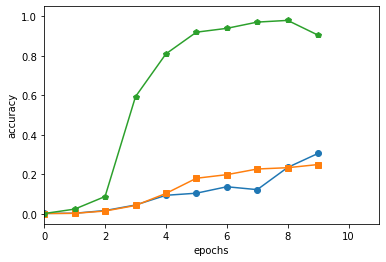

In [30]:
# 繪圖
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.plot(x, acc_list_s2s, marker='s')
plt.plot(x, acc_list_ps2s, marker='p')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 11)
plt.show()